* Un proyecto personal del Covid-19 en la provincia de Córdoba, Argentina.
* Los datos fueron descargados de la pagina: https://datos.gob.ar/

### Leemos los datos y nos quedamos solamente con los datos de Córdoba

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df1 = pd.read_csv("Covid19Casos.csv")

In [3]:
df1.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-10-22
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-10-22
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-10-22
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-10-22
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado co...,Sospechoso,6,NaN,515,2020-10-22


In [4]:
df1.shape

(2577962, 25)

In [5]:
df = df1.loc[df1.loc[:, 'residencia_provincia_nombre'] == 'Córdoba']

In [6]:
df["residencia_provincia_nombre"].unique()

array(['Córdoba'], dtype=object)

In [7]:
df["residencia_departamento_nombre"].unique()

array(['Capital', 'San Justo', 'Colón', 'Punilla', 'Río Cuarto',
       'Santa María', 'Juárez Celman', 'Río Segundo', 'Tercero Arriba',
       'Cruz del Eje', 'General San Martín', 'Unión', 'Marcos Juárez',
       'Calamuchita', 'Río Primero', 'SIN ESPECIFICAR', 'San Javier',
       'General Roca', 'Ischilín', 'San Alberto',
       'Presidente Roque Sáenz Peña', 'Totoral', 'Pocho', 'Tulumba',
       'Río Seco', 'Minas', 'Sobremonte'], dtype=object)

In [8]:
df.shape

(146461, 25)

In [9]:
df.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,1.464610e+05,146424.000000,146461.000000,146461.000000,146461.0,146461.000000
mean,2.483784e+06,40.246729,35.630632,15.139962,14.0,52.737036
std,8.907391e+05,19.163420,7.426790,8.903301,0.0,51.464648
min,7.194050e+05,0.000000,6.000000,2.000000,14.0,0.000000
25%,1.756253e+06,27.000000,32.000000,14.000000,14.0,14.000000
50%,2.767545e+06,38.000000,39.000000,14.000000,14.0,14.000000
75%,3.233531e+06,52.000000,41.000000,14.000000,14.0,98.000000
max,3.684457e+06,120.000000,43.000000,94.000000,14.0,182.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146461 entries, 2 to 2577936
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    146461 non-null  int64  
 1   sexo                              146461 non-null  object 
 2   edad                              146424 non-null  float64
 3   edad_años_meses                   146461 non-null  object 
 4   residencia_pais_nombre            146461 non-null  object 
 5   residencia_provincia_nombre       146461 non-null  object 
 6   residencia_departamento_nombre    146461 non-null  object 
 7   carga_provincia_nombre            146461 non-null  object 
 8   fecha_inicio_sintomas             58144 non-null   object 
 9   fecha_apertura                    146461 non-null  object 
 10  sepi_apertura                     146461 non-null  int64  
 11  fecha_internacion                 5367 non-null    

In [11]:
df.columns.values

array(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento',
       'asistencia_respiratoria_mecanica', 'carga_provincia_id',
       'origen_financiamiento', 'clasificacion', 'clasificacion_resumen',
       'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'], dtype=object)

# Limpieza de datos

* Eliminamos columnas innecesarias
* Reemplazamos los valores de tipo str por enteros

In [12]:
df.drop(['residencia_pais_nombre','ultima_actualizacion','carga_provincia_id',
         'id_evento_caso','fecha_apertura','residencia_departamento_id',
         'carga_provincia_nombre'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df["clasificacion_resumen"].unique()

array(['Descartado', 'Sospechoso', 'Confirmado', 'Sin Clasificar'],
      dtype=object)

In [14]:
#Reemplazamos los valores de la  columna sexo (F o M) a variables enteras
df["sexo"].replace("F", 0, inplace=True)
df["sexo"].replace("M", 1, inplace=True)
df["sexo"].replace("NR", 2, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
#Reemplazamos los valores de la  columna cuidado_instensivo (SI o NO) a variables enteras
df["cuidado_intensivo"].replace("NO", 0, inplace=True)
df["cuidado_intensivo"].replace("SI", 1, inplace=True)

In [16]:
#Reemplazamos los valores de la  columna asistencia_respiratoria_mecanica (SI o NO) a variables enteras
df["asistencia_respiratoria_mecanica"].replace("NO", 0, inplace=True)
df["asistencia_respiratoria_mecanica"].replace("SI", 1, inplace=True)

In [17]:
#Reemplazamos los valores de la  columna fallecido (Si o No) a variables enteras
df["fallecido"].replace("NO", 0, inplace=True)
df["fallecido"].replace("SI", 1, inplace=True)

In [18]:
#Reemplazamos los valores de la  columna clasificacion_resumen (casos confirmados, descartados, Sospechoso, Sin Clasificar) a variables enteras
df['clasificacion_resumen'].replace("Descartado", 1, inplace=True)
df['clasificacion_resumen'].replace("Sospechoso", 2, inplace=True)
df['clasificacion_resumen'].replace("Sin Clasificar", 3, inplace=True)
df['clasificacion_resumen'].replace("Confirmado", 4,inplace=True)

In [19]:
#Nos quedamos con las filas que tienen covid
casos_conf = df[df["clasificacion_resumen"] == 4]
casos_conf.head(2)

,sexo,edad,edad_años_meses,residencia_provincia_nombre,residencia_departamento_nombre,fecha_inicio_sintomas,sepi_apertura,fecha_internacion,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico
851,0,26.0,Años,Córdoba,Capital,NaN,23,NaN,0,NaN,0,NaN,0,Público,Caso confirmado por laboratorio - No activo (p...,4,14,2020-10-03
872,1,59.0,Años,Córdoba,Río Cuarto,2020-05-30,23,NaN,0,NaN,0,NaN,0,Privado,Caso confirmado por laboratorio - No activo (p...,4,14,2020-08-30


In [20]:
casos_conf["sexo"].unique()

array([0, 1, 2])

In [21]:
df["clasificacion_resumen"].unique()

array([1, 2, 4, 3])

## Algunas conclusiones

In [22]:
print (f"Casos descartados: {(df['clasificacion_resumen'] == 1).sum()}")
print (f"Casos sospechosos: {(df['clasificacion_resumen'] == 2).sum()}")
print (f"Casos sin calificar: {(df['clasificacion_resumen'] == 3).sum()}")
print (f"Casos confirmados: {(df['clasificacion_resumen'] == 4).sum()}")

Casos descartados: 60376
Casos sospechosos: 15461
Casos sin calificar: 13
Casos confirmados: 70611


In [23]:
print (f"Fallecidos {(df['fallecido']==1).sum()}")

Fallecidos 1110


In [24]:
print (f"Mujeres confirmadas: {(casos_conf['sexo'] == 0).sum()}")
print (f"Hombres confirmados: {(casos_conf['sexo'] == 1).sum()}")

Mujeres confirmadas: 35740
Hombres confirmados: 34830


In [25]:
#El 61% de los contagiados esta entre los 20 y 50
print (f"Personas menores a 10 (inclusive) contagidas: {(casos_conf['edad'] <= 10).sum()}")
print (f"Personas mayores a 10 y menores de 20 (inclusive) contagidas: {((casos_conf['edad'] > 10) & (casos_conf['edad'] <= 20)).sum()}")
print (f"Personas mayores a 20 y menores de 30 (inclusive) contagidas: {((casos_conf['edad'] > 20) & (casos_conf['edad'] <= 30)).sum()}")
print (f"Personas mayores a 30 y menores de 40 (inclusive) contagidas: {((casos_conf['edad'] > 30) & (casos_conf['edad'] <= 40)).sum()}")
print (f"Personas mayores a 40 y menores de 50 (inclusive) contagidas: {((casos_conf['edad'] > 40) & (casos_conf['edad'] <= 50)).sum()}")
print (f"Personas mayores a 50 y menores de 60 (inclusive) contagidas: {((casos_conf['edad'] > 50) & (casos_conf['edad'] <= 60)).sum()}")
print (f"Personas mayores a 60 y menores de 70 (inclusive) contagidas: {((casos_conf['edad'] > 60) & (casos_conf['edad'] <= 70)).sum()}")
print (f"Personas mayores a 70 y menores de 80 (inclusive) contagidas: {((casos_conf['edad'] > 70) & (casos_conf['edad'] <= 80)).sum()}")
print (f"Personas mayores a 80 y menores de 90 (inclusive) contagidas: {((casos_conf['edad'] > 80) & (casos_conf['edad'] <= 90)).sum()}")
print (f"Personas mayores a 90 contagiados: {((casos_conf['edad'] > 90)).sum()}")

Personas menores a 10 (inclusive) contagidas: 2089
Personas mayores a 10 y menores de 20 (inclusive) contagidas: 5660
Personas mayores a 20 y menores de 30 (inclusive) contagidas: 15090
Personas mayores a 30 y menores de 40 (inclusive) contagidas: 15034
Personas mayores a 40 y menores de 50 (inclusive) contagidas: 12818
Personas mayores a 50 y menores de 60 (inclusive) contagidas: 8959
Personas mayores a 60 y menores de 70 (inclusive) contagidas: 5728
Personas mayores a 70 y menores de 80 (inclusive) contagidas: 3165
Personas mayores a 80 y menores de 90 (inclusive) contagidas: 1664
Personas mayores a 90 contagiados: 390


In [26]:
#Casos por departamento
departamento = casos_conf["residencia_departamento_nombre"].unique()
for i in departamento:
    print (f"Cantidad de casos en {i}: {(casos_conf['residencia_departamento_nombre'] == i).sum()}")

Cantidad de casos en Capital: 32302
Cantidad de casos en Río Cuarto: 9388
Cantidad de casos en General San Martín: 3583
Cantidad de casos en Unión: 1343
Cantidad de casos en Marcos Juárez: 2956
Cantidad de casos en Río Primero: 871
Cantidad de casos en Calamuchita: 936
Cantidad de casos en Punilla: 1836
Cantidad de casos en Colón: 3805
Cantidad de casos en San Justo: 1767
Cantidad de casos en Santa María: 2007
Cantidad de casos en San Javier: 508
Cantidad de casos en San Alberto: 188
Cantidad de casos en Tercero Arriba: 3436
Cantidad de casos en Río Segundo: 1873
Cantidad de casos en General Roca: 335
Cantidad de casos en Juárez Celman: 1500
Cantidad de casos en Cruz del Eje: 323
Cantidad de casos en Totoral: 204
Cantidad de casos en Presidente Roque Sáenz Peña: 568
Cantidad de casos en SIN ESPECIFICAR: 360
Cantidad de casos en Río Seco: 58
Cantidad de casos en Minas: 22
Cantidad de casos en Tulumba: 73
Cantidad de casos en Ischilín: 320
Cantidad de casos en Sobremonte: 35
Cantidad de 

In [27]:
casos_fall = df[df["fallecido"] == 1]
print(casos_fall.shape)
print(casos_fall["fallecido"].sum())

(1110, 18)
1110


In [28]:
cant_fall = casos_fall["fallecido"].sum()
cant_fall_homb = (casos_fall['sexo'] == 1).sum()
cant_fall_muj = (casos_fall['sexo'] == 0).sum()

print (f"Mujeres fallecidas: {cant_fall_muj}")
print (f"Hombres fallecidos: {cant_fall_homb}")

porc_homb_fall = (cant_fall_homb / cant_fall)*100
porc_muj_fall = (cant_fall_muj / cant_fall)*100
print ("Esto seria de los fallecidos un 57% son hombres y un 43% mujeres")
print (f"Porcentaje hombres fallecidos: {round(porc_homb_fall,2)}%")
print (f"Porcentaje mujeres fallecidos: {round(porc_muj_fall,2)}%")

Mujeres fallecidas: 477
Hombres fallecidos: 630
Esto seria de los fallecidos un 57% son hombres y un 43% mujeres
Porcentaje hombres fallecidos: 56.76%
Porcentaje mujeres fallecidos: 42.97%


In [29]:
#Promedio de edad de fallecidos 73.4
prom_edad_fallecidos = casos_fall["edad"].mean()
round(prom_edad_fallecidos, 2)

73.43

In [30]:
#Como fallecido es 0 y 1, podemos concluir que el 1.23% de las mujeres contagiadas fallecen y el 1.16% de los hombres contagiados fallecen en cordoba
casos_conf[["sexo", "fallecido"]].groupby("sexo").mean()

,fallecido
sexo,
0,0.012395
1,0.016796
2,0.073171


In [31]:
#El promedio de edad de personas que no necesitaron respiracion asistida fue de 41, y el promedio de personas
#que si necesitaron respiracion asistida fue de 68
casos_conf[["asistencia_respiratoria_mecanica", "edad"]].groupby("asistencia_respiratoria_mecanica").mean()

,edad
asistencia_respiratoria_mecanica,
0,40.906055
1,67.581560


In [32]:
casos_conf_ar = (casos_conf["asistencia_respiratoria_mecanica"] == 1).sum()
casos_confirmados = (df['clasificacion_resumen'] == 4).sum()
porcentaje_resp_asist = casos_conf_ar/casos_confirmados*100
print (f"De los casos confirmados un {round(porcentaje_resp_asist,2)}% necesitó respiracion asistida")

De los casos confirmados un 0.2% necesitó respiracion asistida


In [33]:
#El promedio de edad de confirmados con cuidado intensivo  es de 70 y el promedio de de edad que no recibieron cuidado intensivo es de 40 
casos_conf[["cuidado_intensivo", "edad"]].groupby("cuidado_intensivo").mean()

,edad
cuidado_intensivo,
0,40.729272
1,69.732143


## Algunos graficos

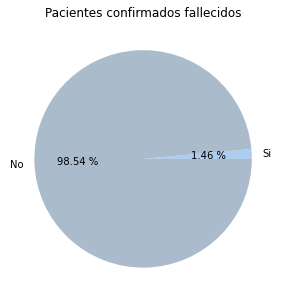

In [34]:
si = casos_conf.loc[casos_conf['fallecido'] == 1].count()[0]
no = casos_conf.loc[casos_conf['fallecido'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Si', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([si, no], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Pacientes confirmados fallecidos')

plt.show()

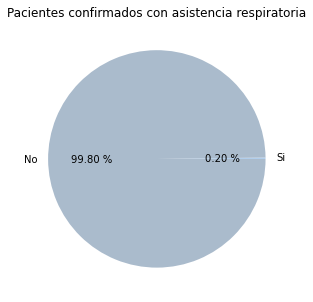

In [35]:
si = casos_conf.loc[casos_conf['asistencia_respiratoria_mecanica'] == 1].count()[0]
no = casos_conf.loc[casos_conf['asistencia_respiratoria_mecanica'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Si', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([si, no], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Pacientes confirmados con asistencia respiratoria')

plt.show()

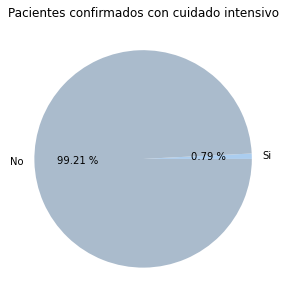

In [36]:
si = casos_conf.loc[casos_conf['cuidado_intensivo'] == 1].count()[0]
no = casos_conf.loc[casos_conf['cuidado_intensivo'] == 0].count()[0]

plt.figure(figsize=(8,5))

labels = ['Si', 'No']
colors = ['#abcdef', '#aabbcc']

plt.pie([si, no], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Pacientes confirmados con cuidado intensivo')

plt.show()